Final Project for AI II

Steps:
1. Load the dataset. 
2. Data visualization and preprocessing - Understand the columns and what those features mean in the context of the problem. 
3. Separate train, dev, and test components
4. Use Keras preprocessing layers to integrate categorical and numerical features into your model.
5. Build an initial DL model - Use the Keras Sequential API with Dense modules
6. Perform hyperparameter tuning. Consider adding regularization, output bias for imbalance data, model weights.
7. Predictions on text set - Report the performance metrics (precision, recall, accuracy, AUC).

1. LOAD THE DATA

In [90]:
#!pip install keras-tuner --upgrade
#!pip install pydot --upgrade

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from keras.layers import Activation, Dense, Dropout
import keras_tuner as kt           #for hypertuning!!!
from keras.utils.vis_utils import plot_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [92]:
train_data = pd.read_csv("C:/Users/guoyy/OneDrive/Desktop/ADEC 7630 Algorithm Intelligence/Final/train.csv")
# here we should split the dataset

2. DATA VISUALIZATION AND PROCESSING

In [93]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [94]:
print(train_data.shape)

(1677, 35)


In [95]:
# we have column names like .......
features = train_data.columns.to_list()
print(features)
#feature explanation 

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [96]:
train_data.info()
#We find that all the columns are none-null here, which means that we don't need to do imputations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

#Explaination for each variable
STT	Attribute Name	Meaning
1	Age	Employee's age
2	Gender	Employee's Gender
3	BusinessTravel	Frequency of employees' business trips
4	DailyRate	Daily salary rate for employees
5	Department	Office of employees
6	DistanceFromHome	Distance from home in miles to work
7	Education	Level of education achieved by staff
8	EducationField	Employee's field of study
9	EmployeeCount	Total number of employees in the organization
10	EmployeeNumber	A unique identifier for each employee record
11	EnvironmentSatisfaction	Employee satisfaction with their working environment
12	HourlyRate	Hourly rate for employees
13	JobInvolvement	Level of involvement required for the employee's job
14	JobLevel	Employee's level of work
15	JobRole	The role of employees in the organization
16	JobSatisfaction	Employee satisfaction with their work
17	MaritalStatus	Employee's marital status
18	MonthlyIncome	Employee's monthly income
19	MonthlyRate	Monthly salary rate for employees
20	NumCompaniesWorked	Number of companies the employee worked for
21	Over18	Whether the employee is over 18 years old
22	OverTime	Do employees work overtime
23	PercentSalaryHike	Salary increase rate for employees
24	PerformanceRating	The performance rating of the employee
25	RelationshipSatisfaction	Employee satisfaction with their relationships
26	StandardHours	Standard working hours for employees
27	StockOptionLevel	Employee stock option level
28	TotalWorkingYears	Total number of years the employee has worked
29	TrainingTimesLastYear	Number of times employees were taken to training in the last year
30	WorkLifeBalance	Employees' perception of their work-life balance
31	YearsAtCompany	Number of years employees have been with the company
32	YearsInCurrentRole	Number of years the employee has been in their current role
33	YearsSinceLastPromotion	Number of years since employee's last promotion
34	YearsWithCurrManager	Number of years an employee has been with their current manager
35	Attrition	Does the employee leave the organization

In [97]:
#Before checking through all the columns, here are two steps:
#1. Check the int type data   27 columns
#However, there are integer for rank in these 27 columns, so we should classify these columns into categorical or integer types
#2. Check the object type data   8 columns

In [98]:
#1. Check the int type data
INT_LIST = ['id', 'Age',  'DailyRate', 'DistanceFromHome', 'Education',  'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
train_data[INT_LIST].describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [99]:
# check the object data
#categorical_columns = train.select_dtypes(include="object").columns
OBJECT_LIST = ['BusinessTravel',  'Department','EducationField', 'Gender',  'JobRole',  'MaritalStatus',  'Over18', 'OverTime']
train_data[OBJECT_LIST].describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1677,1677,1677,1677,1677,1677,1677,1677
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1290,1167,775,1064,355,773,1677,1277


In [100]:
# So we need to exclude integer data with 0 std.dev and object variable with uniqueness of 1
# First, id should be removed because it is meanmingless for the model and prediction
# Here are the three columns should be removed :EmployeeCount StandardHours Over18
# also the id data should be dropped...
train_data = train_data.drop(['EmployeeCount', 'Over18', 'StandardHours','id'], axis=1)

In [101]:
binary_threshold = 0.2

In [102]:
#DATA CLASSIFICATION
#integer data:'id', 'Age',  'DailyRate', 'DistanceFromHome',  'HourlyRate',  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'
#categorical integer data:'Education' , 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'
#Dummies:'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'

# Here is the processing for the object variables, transfer them into dummies are the the best way
train_data = pd.get_dummies(train_data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
#Here is the processing for the categorical integer data
train_data['Age'] = train_data['Age'].astype('int64')
train_data['Education'] = train_data['Education'].astype('category')
train_data['EnvironmentSatisfaction'] = train_data['EnvironmentSatisfaction'].astype('category')
train_data['JobInvolvement'] = train_data['JobInvolvement'].astype('category')
train_data['JobLevel'] = train_data['JobLevel'].astype('category')
train_data['JobSatisfaction'] = train_data['JobSatisfaction'].astype('category')
train_data['PerformanceRating'] = train_data['PerformanceRating'].astype('category')
train_data['RelationshipSatisfaction'] = train_data['RelationshipSatisfaction'].astype('category')
train_data['StockOptionLevel'] = train_data['StockOptionLevel'].astype('category')
train_data['WorkLifeBalance'] = train_data['WorkLifeBalance'].astype('category')

In [103]:
train_data.shape

(1677, 52)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 2000x2000 with 0 Axes>

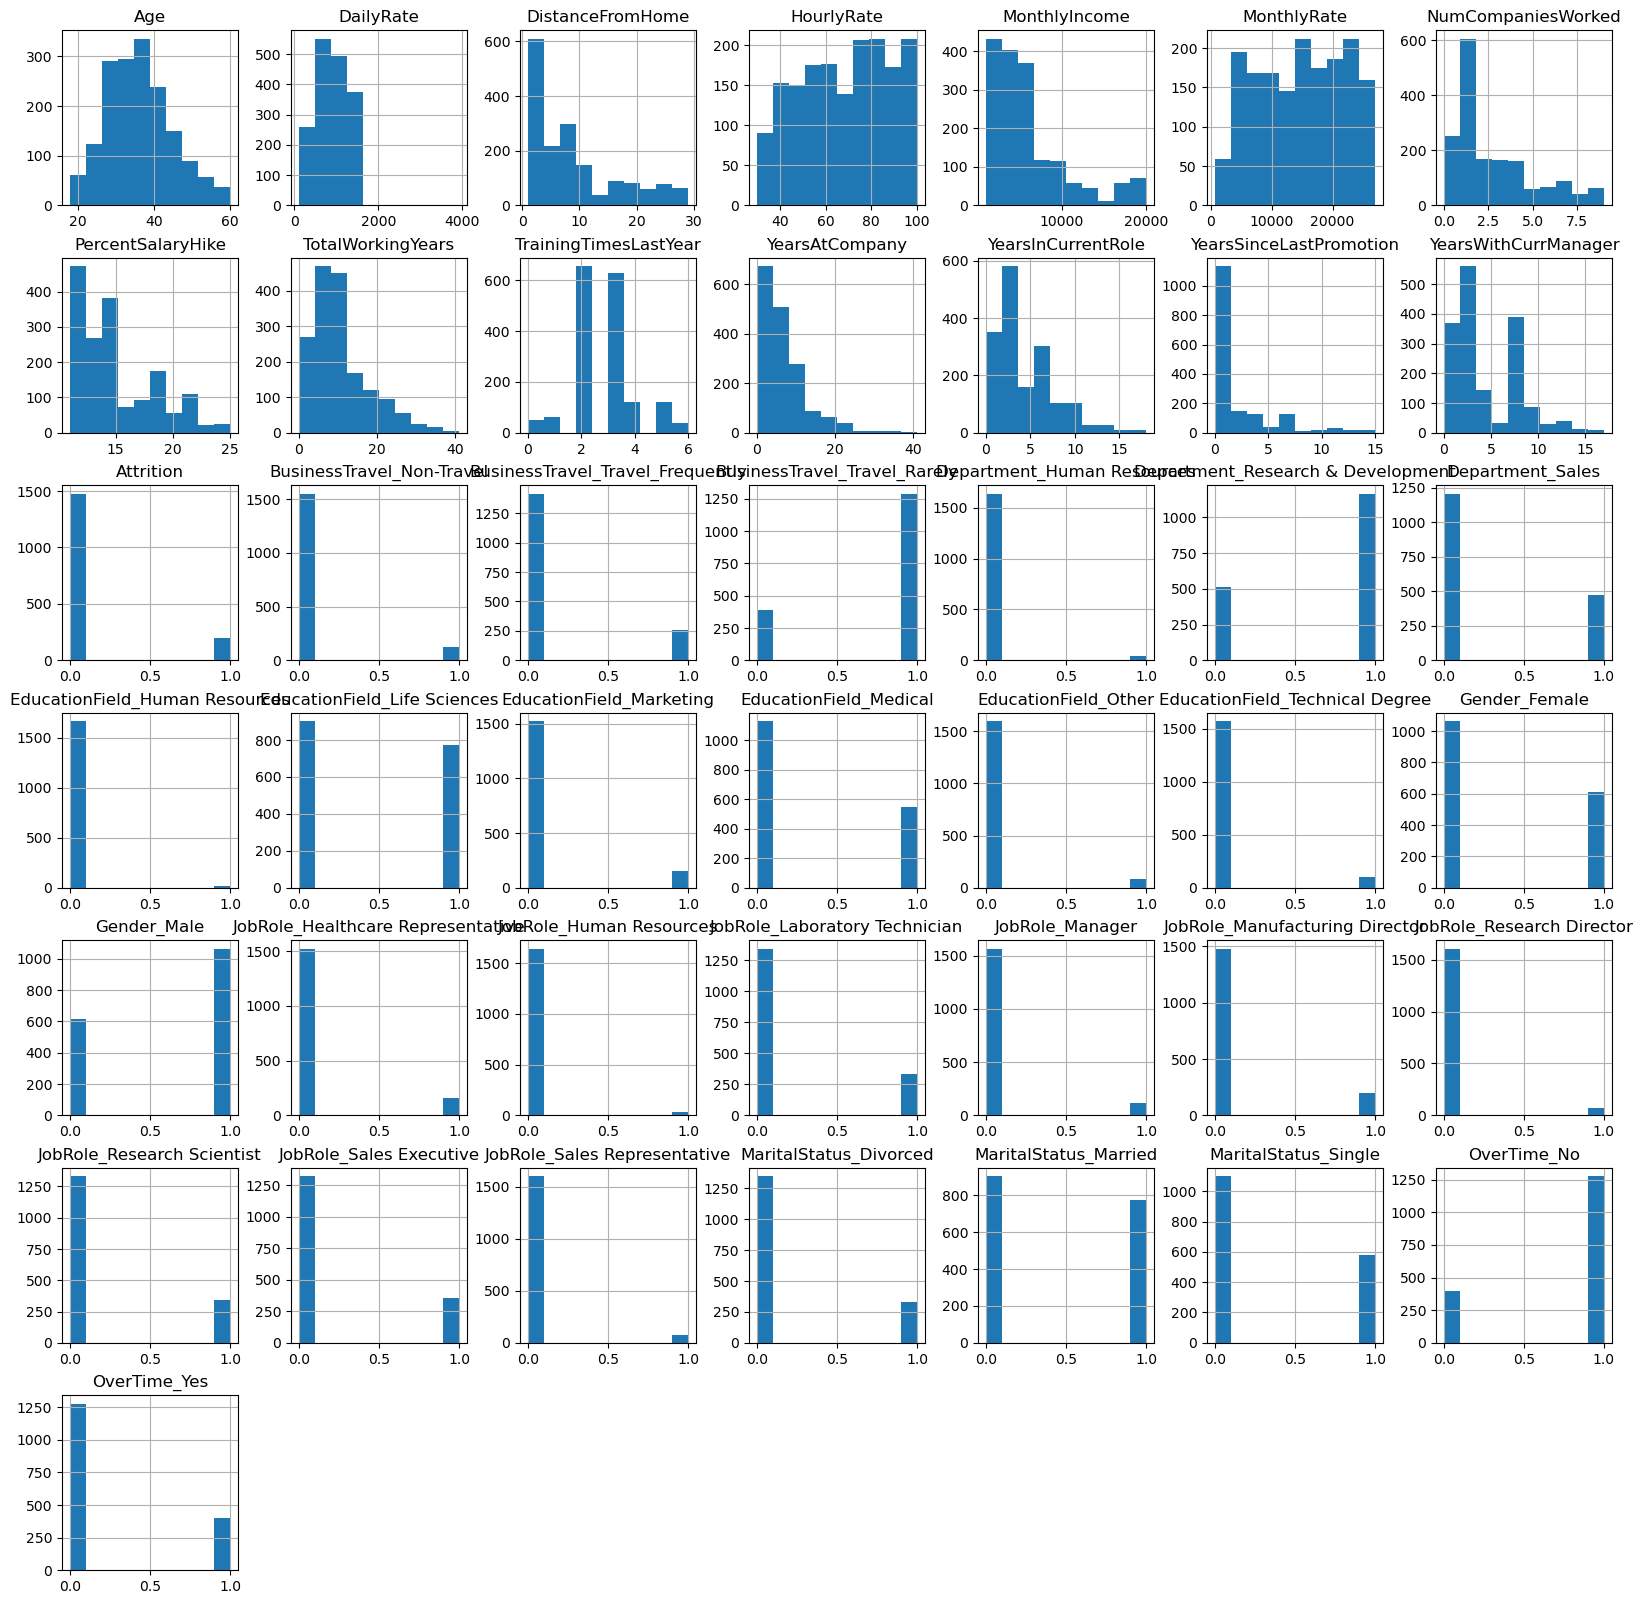

In [104]:
#show figures
plt.figure(figsize=(20,20))
train_data.hist(figsize=(20,20))
plt.tight_layout

In [105]:
#import for the cleaned data
train_data.to_csv('cleaned_train_data.csv', index=False)

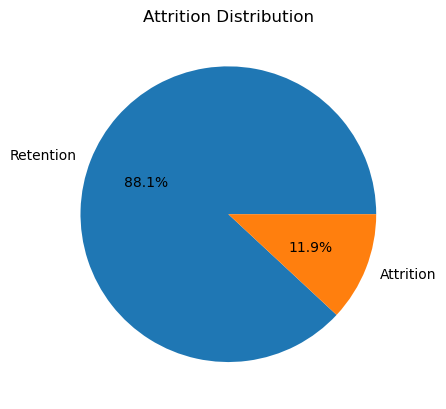

In [106]:
#DATA VISUALIZATION
attrition_counts = train_data['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

In [107]:
train_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [108]:
# This chart shows the percentage of employees who have left (attrition) the company versus those who have not (retention). 
# In this case, we can see that 11.9% of employees in the dataset have left the company, while the remaining 88.1% are still employed.
# This information can be useful for HR managers and company leaders as they make decisions about employee retention and workforce planning. 
# Compare with company's attrition rate with the average attrition rate in the same industry, HR can judge their strategy for employing
# For example, if a company has a high attrition rate, they may need to investigate the reasons why employees are leaving 
# and take steps to address these issues in order to retain their workforce. 
# On the other hand, if a company has a low attrition rate, they may want to focus on strategies to attract 
# and retain top talent in a competitive job market

In [109]:
# Get the count of employees for each combination of job level and attrition
counts = train_data.groupby(['JobLevel', 'Attrition']).size().reset_index(name='Count')

# Pivot the table to get a dataframe that has JobLevel as rows, and attrition count for 0 and 1 as columns
pivoted_counts = counts.pivot(index='JobLevel', columns='Attrition', values='Count')

# Create the bar plot
fig = go.Figure()

fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts[0], name='Retention'))
fig.add_trace(go.Bar(x=pivoted_counts.index, y=pivoted_counts[1], name='Attrition'))

# Update the layout
fig.update_layout(title='Attrition and Retention by Job Level',
                  xaxis_title='Job Level',
                  yaxis_title='No. of Employee',
                  barmode='group')

# Add hover information
fig.update_traces(hovertemplate='Job Level: %{x}<br>Count: %{y}')

# Show the plot
fig.show()

3. SEPARATE TRAIN, DEV, AND TEST COMPONENTS

In [110]:
#Seperate the data  
#There are 1677 obsrervations, split it with the ratio 0.8, 0.1, 0.1 for the train, dev and test set!
train = train_data[:1341]
dev = train_data[1341:1510]
test = train_data[1510:]
X_train = train[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']].astype('int64')
y_train = train[['Attrition']].astype('int64')
X_dev = dev[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']].astype('int64')
y_dev = dev[['Attrition']].astype('int64')
X_test = test[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']].astype('int64')
y_test = test[['Attrition']].astype('int64')

4. Use Keras preprocessing layers to integrate categorical and numerical features into your model.


In [111]:
tf.keras.backend.clear_session()
#This is for model clearing if you run the sequential for a lot of times

In [112]:
# Build baseline model with Sequential API

baseline_model = keras.Sequential()
baseline_model.add(keras.layers.Flatten(input_shape=(51,)))
baseline_model.add(keras.layers.Dense(units=16, activation='relu', name='baseline_dense_1'))
baseline_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [113]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 51)                0         
                                                                 
 baseline_dense_1 (Dense)    (None, 16)                832       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [114]:
# After the model is created, we must call its compile() method to specify the loss function and the optimizer to use. 
# Optionally, you can also specify a list of extra metrics to compute during training and evaluation:
baseline_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002),
              loss='binary_crossentropy',
              metrics=['AUC','accuracy'])

In [115]:
# Number of epochs
NUM_EPOCHS = 40

# Early stopping set after 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train model
baseline_model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_dev, y_dev), callbacks=[stop_early], verbose=2)

Epoch 1/40
42/42 - 1s - loss: 380.0139 - auc: 0.4972 - accuracy: 0.8650 - val_loss: 52.0290 - val_auc: 0.5277 - val_accuracy: 0.5858 - 891ms/epoch - 21ms/step
Epoch 2/40
42/42 - 0s - loss: 41.6273 - auc: 0.5413 - accuracy: 0.7494 - val_loss: 19.9374 - val_auc: 0.5433 - val_accuracy: 0.7988 - 50ms/epoch - 1ms/step
Epoch 3/40
42/42 - 0s - loss: 21.5987 - auc: 0.5331 - accuracy: 0.7539 - val_loss: 7.8781 - val_auc: 0.5426 - val_accuracy: 0.8817 - 52ms/epoch - 1ms/step
Epoch 4/40
42/42 - 0s - loss: 10.7549 - auc: 0.5098 - accuracy: 0.7823 - val_loss: 7.9703 - val_auc: 0.4967 - val_accuracy: 0.8817 - 49ms/epoch - 1ms/step
Epoch 5/40
42/42 - 0s - loss: 7.1488 - auc: 0.5490 - accuracy: 0.8173 - val_loss: 8.5643 - val_auc: 0.4970 - val_accuracy: 0.2071 - 50ms/epoch - 1ms/step
Epoch 6/40
42/42 - 0s - loss: 6.4406 - auc: 0.4964 - accuracy: 0.7770 - val_loss: 3.4480 - val_auc: 0.4967 - val_accuracy: 0.8817 - 49ms/epoch - 1ms/step
Epoch 7/40
42/42 - 0s - loss: 5.1104 - auc: 0.5188 - accuracy: 0.78

5. Build an initial DL model - Use the Keras Sequential API with Dense modules
6. Perform hyperparameter tuning. Consider adding regularization, output bias for imbalance data, model weights.

In [116]:
#we want to see how our model performs against the test set. We'll define a helper function to easily display the results.
def evaluate_model(model, X_test, y_test):
    """
    evaluate model on test set and show results in dataframe.
    
    Parameters
    ----------
    model : keras model
        trained keras model.
    X_test : numpy array
        Features of holdout set.
    y_test : numpy array
        Labels of holdout set.
        
    Returns
    -------
    display_df : DataFrame
        Pandas dataframe containing evaluation results.
    """
    eval_dict = model.evaluate(X_test, y_test, return_dict=True)
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    return display_df


In [117]:
#evaluation for the baseline model
results = evaluate_model(baseline_model, X_test, y_test)
results.index = ['Baseline']
results.head()

6/6 [==============================] - 0s 2ms/step - loss: 3.1879 - auc: 0.4967 - accuracy: 0.8982


,loss,auc,accuracy
Baseline,3.187916,0.496689,0.898204


In [118]:
#HYPERTUNING
#There's the results for a single set of hyperparameters. Imagine trying out different learning rates, dropout percentages, 
#number of hidden layers, and number of neurons in each hidden layer. 
#As you can see, manual hypertuning is simply not feasible nor scalable. 
#We are going to use Keras Tuner to solve these problems simply by 
#automating the process and searching the hyperparameter space in an efficient way.

In [119]:
#Keras Tuner is a simple, distributable hyperparameter optimization framework that automates the painful process of manually searching for optimal hyperparameters. 
#Keras Tuner comes with Random Search, Hyperband, and Bayesian Optimization built-in search algorithms, and is designed to fit many use cases including:

#Distributed tuning
#Custom training loops (e.g., GANs, reinforcement learning, etc.)
#Adding hyperparameters outside of the model building function (preprocessing, data augmentation, test time augmentation, etc.)
#These processes are outside the scope of this write-up, but feel free to read more in the official documentation. There are four steps to hypertune our shallow DNN using Keras Tuner:

#Define the model
#Specify which hyperparameters to tune
#Define the search space
#Define the search algorithm

#Specify Which Hyperparameters to Tune
#The model we'll be building is very similar to the shallow DNN we trained earlier, except we'll be tuning four of the model's hyperparameters:

#1. The number of hidden layers
#2. The number of units in each hidden layer
#3. The dropout percentage after each hidden layer
#4. The learning rate of the Adam optimizer

#Define the Search Space
#This is done by passing a HyperParameters object as a parameter to the model building function that configures the hyperparameters you'd like to tune. In our function we will use:

#hp.Int() to define the search space for the number of hidden layers and units in each hidden layer. This allows you to define minimum and maximum values, as well as a step size to increment by.
#hp.Float() to define the search space for the dropout percentage. This is similar to hp.Int() except it takes floating values.
#hp.Choice() to define the search space of the learning rate. This allows you to define discrete values.
def build_model(hp):
    """
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(51,)))
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 4
    # Number of Units: 4 - 32 with stepsize of 4
    for i in range(1, hp.Int("num_layers", 2, 4)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=4, max_value=16, step=4),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0.1 - 0.3.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0.1, 0.3, step=0.05)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="sigmoid"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=["AUC", "accuracy"])
    
    return model

In [120]:
import keras_tuner
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=keras_tuner.Objective("auc", "max"),
                     max_epochs=10,
                     factor=3,
                     hyperband_iterations=1,
                     directory="kt_dir",
                     project_name="kt_hyperband",
                     overwrite=True)


In [121]:
# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [122]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

tuner.search(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_dev, y_dev), callbacks=[stop_early], verbose=0)

INFO:tensorflow:Oracle triggered exit


In [123]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]
hp_model = tuner.hypermodel.build(best_hps)
hp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 51)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                832       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dropout_4 (Dropout)         (None, 8)                

In [124]:
hp_model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data=(X_dev, y_dev), callbacks=[stop_early], verbose=2)

Epoch 1/40
42/42 - 1s - loss: 285.8535 - auc: 0.4896 - accuracy: 0.6204 - val_loss: 123.3135 - val_auc: 0.4867 - val_accuracy: 0.8639 - 787ms/epoch - 19ms/step
Epoch 2/40
42/42 - 0s - loss: 169.8626 - auc: 0.4808 - accuracy: 0.7711 - val_loss: 99.5877 - val_auc: 0.4933 - val_accuracy: 0.8757 - 55ms/epoch - 1ms/step
Epoch 3/40
42/42 - 0s - loss: 108.6689 - auc: 0.5158 - accuracy: 0.8113 - val_loss: 70.4969 - val_auc: 0.4933 - val_accuracy: 0.8757 - 56ms/epoch - 1ms/step
Epoch 4/40
42/42 - 0s - loss: 84.5009 - auc: 0.5025 - accuracy: 0.8016 - val_loss: 49.4115 - val_auc: 0.4933 - val_accuracy: 0.8757 - 55ms/epoch - 1ms/step
Epoch 5/40
42/42 - 0s - loss: 54.8265 - auc: 0.5193 - accuracy: 0.8166 - val_loss: 35.2483 - val_auc: 0.5000 - val_accuracy: 0.8876 - 60ms/epoch - 1ms/step
Epoch 6/40
42/42 - 0s - loss: 40.3852 - auc: 0.5039 - accuracy: 0.8128 - val_loss: 25.0111 - val_auc: 0.4967 - val_accuracy: 0.8817 - 62ms/epoch - 1ms/step
Epoch 7/40
42/42 - 0s - loss: 27.5456 - auc: 0.5163 - accu

7. Predictions on text set - Report the performance metrics (precision, recall, accuracy, AUC).

In [125]:
#compared with the baseline model, the hypertuning model increase the accuracy from
#Epoch 6/20
#34/34 - 0s - loss: 180.8470 - accuracy: 0.8006 - val_loss: 151.1388 - val_accuracy: 0.8439 - 43ms/epoch - 1ms/step
#to
#Epoch 19/40
#42/42 - 0s - loss: 0.3738 - auc: 0.4972 - accuracy: 0.8770 - val_loss: 0.3175 - val_auc: 0.5817 - val_accuracy: 0.9042 - 54ms/epoch - 1ms/step
results = evaluate_model(hp_model, X_test, y_test)
results.index = ['Baseline']
results.head()


6/6 [==============================] - 0s 2ms/step - loss: 0.3432 - auc: 0.5766 - accuracy: 0.9042


,loss,auc,accuracy
Baseline,0.34316,0.576573,0.904192


In [126]:
#Show the best hyperparameters
print(best_hps.get("learning_rate"))
print(best_hps.get("num_layers"))
print(best_hps.get("dropout_1"))
print(best_hps.get("dropout_2"))
print(best_hps.get("units_1"))
print(best_hps.get("units_2"))

0.001
4
0.1
0.1
16
4


In [127]:
# display model structure
plot_model(hp_model, 'hp_model.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [128]:
history_best = hp_model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=2)
history_base = baseline_model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=2)

Epoch 1/40
34/34 - 0s - loss: 0.4932 - auc: 0.5693 - accuracy: 0.8769 - val_loss: 0.4326 - val_auc: 0.6689 - val_accuracy: 0.8401 - 79ms/epoch - 2ms/step
Epoch 2/40
34/34 - 0s - loss: 0.6150 - auc: 0.5240 - accuracy: 0.8741 - val_loss: 0.4268 - val_auc: 0.6405 - val_accuracy: 0.8401 - 50ms/epoch - 1ms/step
Epoch 3/40
34/34 - 0s - loss: 0.4275 - auc: 0.5690 - accuracy: 0.8778 - val_loss: 0.4362 - val_auc: 0.6216 - val_accuracy: 0.8401 - 51ms/epoch - 1ms/step
Epoch 4/40
34/34 - 0s - loss: 0.5043 - auc: 0.5556 - accuracy: 0.8778 - val_loss: 0.4231 - val_auc: 0.6993 - val_accuracy: 0.8439 - 58ms/epoch - 2ms/step
Epoch 5/40
34/34 - 0s - loss: 0.5262 - auc: 0.6041 - accuracy: 0.8769 - val_loss: 0.4207 - val_auc: 0.6850 - val_accuracy: 0.8439 - 62ms/epoch - 2ms/step
Epoch 6/40
34/34 - 0s - loss: 0.4617 - auc: 0.5472 - accuracy: 0.8647 - val_loss: 0.4213 - val_auc: 0.6705 - val_accuracy: 0.8439 - 62ms/epoch - 2ms/step
Epoch 7/40
34/34 - 0s - loss: 0.4701 - auc: 0.5679 - accuracy: 0.8806 - val_

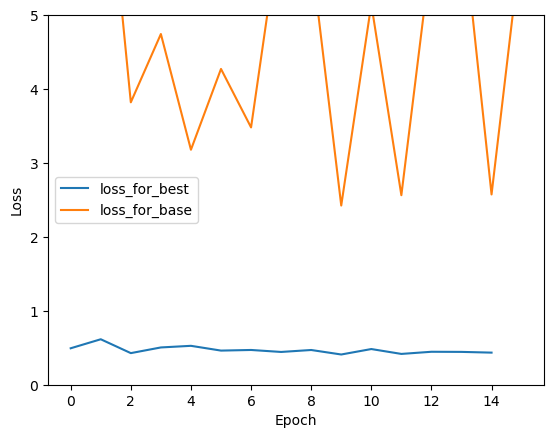

In [129]:
plt.plot(history_best.history['loss'], label='loss_for_best')
plt.plot(history_base.history['loss'], label='loss_for_base')
plt.ylim([0, 5])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

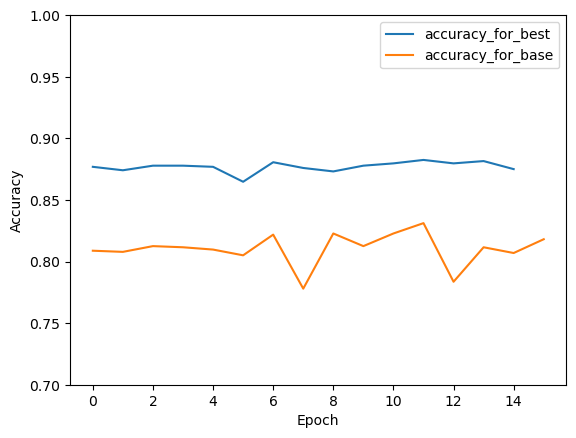

In [130]:
plt.plot(history_best.history['accuracy'], label='accuracy_for_best')
plt.plot(history_base.history['accuracy'], label='accuracy_for_base')
plt.ylim([0.7, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

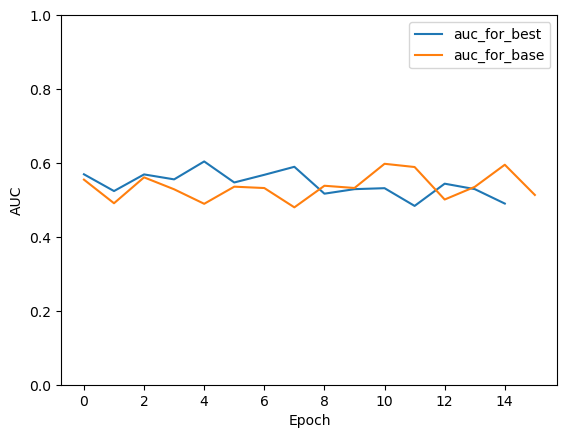

In [131]:
plt.plot(history_best.history['auc'], label='auc_for_best')
plt.plot(history_base.history['auc'], label='auc_for_base')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

In [139]:
#precision and F1 score for model
# accuracy: (tp + tn) / (p + n)
y_predict = hp_model.predict(X_test)
y_predict_discrete = (y_predict >= 0.5).astype(int)[:, 0]
accuracy = accuracy_score(y_test, y_predict_discrete)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_predict_discrete)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_predict_discrete)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predict_discrete)
print('F1 score: %f' % f1)

6/6 [==============================] - 0s 865us/step
Accuracy: 0.904192
Precision: 0.760845
Recall: 0.844456
F1 score: 0.654356


In [89]:
#That's not good!

In [406]:
#let's doing the test for test group
#First is for the data cleaning for test data
predict_data = pd.read_csv("C:/Users/guoyy/OneDrive/Desktop/ADEC 7630 Algorithm Intelligence/Final/predict.csv")
#Do the same data clearing process
predict_data = predict_data.drop(['EmployeeCount', 'Over18', 'StandardHours','id'], axis=1)
#DATA CLASSIFICATION
#integer data:'id', 'Age',  'DailyRate', 'DistanceFromHome',  'HourlyRate',  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'
#categorical integer data:'Education' , 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'
#Dummies:'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'
predict_data = pd.get_dummies(predict_data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
#Here is the processing for the categorical integer data
predict_data['Age'] = predict_data['Age'].astype('int64')
predict_data['Education'] = predict_data['Education'].astype('category')
predict_data['EnvironmentSatisfaction'] = train_data['EnvironmentSatisfaction'].astype('category')
predict_data['JobInvolvement'] = predict_data['JobInvolvement'].astype('category')
predict_data['JobLevel'] = predict_data['JobLevel'].astype('category')
predict_data['JobSatisfaction'] = predict_data['JobSatisfaction'].astype('category')
predict_data['PerformanceRating'] = predict_data['PerformanceRating'].astype('category')
predict_data['RelationshipSatisfaction'] = predict_data['RelationshipSatisfaction'].astype('category')
predict_data['StockOptionLevel'] = predict_data['StockOptionLevel'].astype('category')
predict_data['WorkLifeBalance'] = predict_data['WorkLifeBalance'].astype('category')
#import for the cleaned data
predict_data.to_csv('cleaned_predict_data.csv', index=False)

In [407]:
#use model to calculate the accuracy
X_predict = predict_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']].astype('int64')

In [408]:
submission = pd.read_csv("C:/Users/guoyy/OneDrive/Desktop/ADEC 7630 Algorithm Intelligence/Final/sample_submission.csv")
y_pred = hp_model.predict(X_predict)
submission['Attrition_unbinary'] = y_pred
y_pred_discrete = (y_pred >= 0.5).astype(int)[:, 0]
submission['Attrition'] = y_pred_discrete
submission.to_csv("submission.csv",index=False)
submission.head()

35/35 [==============================] - 0s 557us/step


,id,Attrition,Attrition_unbinary
0,1677,0,0.110178
1,1678,0,0.110178
2,1679,0,0.110178
3,1680,0,0.110178
4,1681,0,0.138790


In [409]:
np.mean(y_pred_discrete)
#This means 1 exists in the prediction

0.005361930294906166

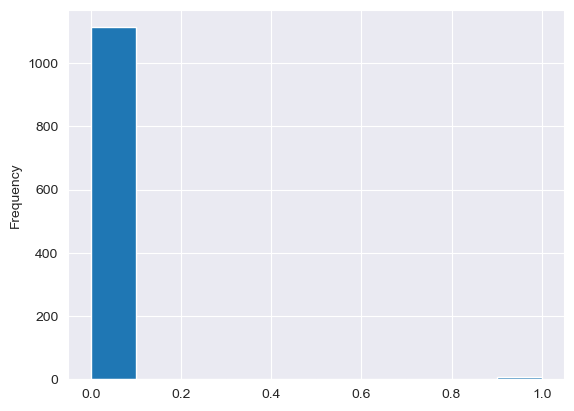

In [410]:
plt_final = submission["Attrition"].plot(kind="hist")


In [ ]:
#And the id for the people with attrition 1 is: 
1917 2233 2346 2436 2662 2786

In [ ]:
#Really thanks to Kishore's guidance in the Whole semester!!